
# Scikit-Learn and Statsmodels Tutorial

In this notebook, we will explore:
1. **Clustering with KMeans (scikit-learn)**
2. **Elastic Net regression (scikit-learn)**
3. **Principal Component Analysis (PCA) visualization**
4. **Compare scikit-learn regression to statsmodels OLS with detailed statistics**


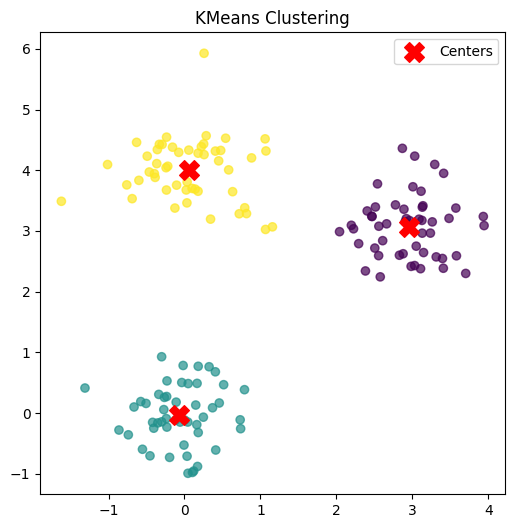

In [1]:

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic 2D data
np.random.seed(42)
X = np.vstack([
    np.random.normal([0,0], 0.5, size=(50,2)),
    np.random.normal([3,3], 0.5, size=(50,2)),
    np.random.normal([0,4], 0.5, size=(50,2))
])

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Plot clusters
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis", alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            c="red", marker="X", s=200, label="Centers")
plt.title("KMeans Clustering")
plt.legend()
plt.show()


In [2]:

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Synthetic regression data
np.random.seed(42)
X = np.random.randn(100, 5)
coef = np.array([1.5, -2.0, 0, 0, 3.0])
y = X @ coef + np.random.normal(0, 1, 100)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Elastic Net
model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
model.fit(X_train, y_train)

print("Estimated coefficients:", model.coef_)
print("MSE on test set:", mean_squared_error(y_test, model.predict(X_test)))


Estimated coefficients: [ 1.47701548 -1.76544912  0.          0.          2.83402965]
MSE on test set: 0.8807022802406788


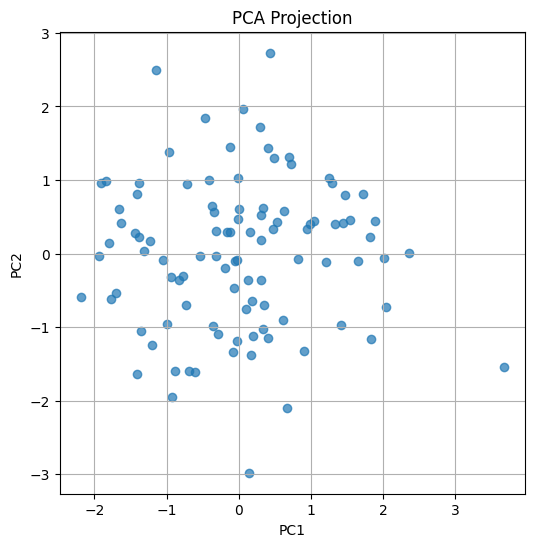

Explained variance ratio: [0.26256655 0.21579693]


In [3]:

from sklearn.decomposition import PCA

# Use earlier synthetic data X from clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_)


In [4]:

import statsmodels.api as sm

# OLS regression with statsmodels
X_sm = sm.add_constant(X_train)  # add intercept
ols_model = sm.OLS(y_train, X_sm).fit()

print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     305.9
Date:                Wed, 20 Aug 2025   Prob (F-statistic):           6.26e-48
Time:                        14:22:50   Log-Likelihood:                -103.92
No. Observations:                  80   AIC:                             219.8
Df Residuals:                      74   BIC:                             234.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1115      0.105     -1.059      0.2